In [1]:
import os, os.path

import json
import whoosh
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.analysis import StemmingAnalyzer
from whoosh import index
import pandas as pd
import numpy as np
import shutil
import re
from tqdm import tqdm

In [2]:
with open('../data/elixier_chemie_all.json', 'r') as f:
    chemie = json.load(f)

In [3]:
df = pd.read_csv('../data/elixier_physics_all.csv', index_col=0)

In [4]:
def parse_description(desc):
    if not pd.isna(desc):
        return desc.split(';')[0]
    return desc
df['description'] = df.description.apply(parse_description)

In [5]:
def split_kws(kw):
    try:
        if pd.isna(kw):
            return kw
        else:
            cleaned = re.sub(' ?Sekundarstufe II?', '', kw).replace(';', '')
            phrases = []
            if 'Deutsch als Zweitsprache' in cleaned:
                phrases.append('Deutsch als Zweitsprache')
                cleaned = cleaned.replace('Deutsch als Zweitsprache', '')
            if 'Deutsch als Fremdsprache' in cleaned:
                phrases.append('Deutsch als Fremdsprache')
                cleaned = cleaned.replace('Deutsch als Fremdsprache', '')
            return ','.join([p for p in cleaned.split(' ') if p] + phrases)
    except Exception as e:
        print(kw)
        raise e

df['schlagwörter'] = df['schlagwörter'].apply(split_kws)

In [6]:
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.analysis import StemmingAnalyzer

In [7]:
schema = Schema(url=ID(stored=True),
                title=TEXT(stored=True),
                description=TEXT(stored=True),
                keywords=KEYWORD(stored=True, 
                                 lowercase=True, 
                                 scorable=True, 
                                 commas=True))

In [8]:
from whoosh import index

if os.path.exists("indexdir"):
    shutil.rmtree('indexdir')
    os.mkdir("indexdir")
else:
    os.mkdir("indexdir")

ix = index.create_in("indexdir", schema)

In [9]:
writer = ix.writer()

In [10]:
def handle_nan(value):
    if pd.isna(value):
        return None
    return value

In [11]:
# for _, row in tqdm(df.iterrows(), total=df.shape[0], desc='Physics'):
#     writer.add_document(
#         url=handle_nan(row['url']), 
#         title=handle_nan(row['title']),
#         description=handle_nan(row['description']), 
#         keywords=handle_nan(row['schlagwörter']))
    
for cm in tqdm(chemie, desc='Chemistry'):
    writer.add_document(
        url=handle_nan(cm['url']), 
        title=handle_nan(cm['title']),
        description=handle_nan(cm['description']), 
        keywords=handle_nan(cm.get('Schlagwörter:')))

writer.commit()

Chemistry: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1762/1762 [00:00<00:00, 3133.84it/s]


In [12]:
chemie_terms = {
'learning_material_type': [
 'Unterrichtsmaterial',
 'Experiment',
 'Chemieunterricht',
 'Arbeitsblatt',
 'Laborarbeit',
 'Lernmaterial',
 'Erfahrungslernen',
 'Gruppenarbeit',
 'Handreichung',
 'Grafik',
 'Bild',
 'Film',
 'Unterricht', 
 'Animation',
 'Materialsammlung',
 'Daten',
 'Quiz',
 'Lernmodul',
 'Unterrichtsgestaltung',
 'Unterrichtsplanung',
 'Berufsausbildung',
 'Einführung'
 'Grundlagen',
 'Software',
 'Spiel',
 'Sprachbildung',
 'Foto',
 'Video',
 'Sachunterricht',
 'Schaubild'
 'Text',
 'Unterrichtseinheit',
 'Lehrmittel',
 'Übung',
 'Anfangsunterricht',
 'Beispiel',
 'Aufgaben',
 'Lernplattform',
 'Lernprogramm',
 'Lernsoftware',
 'Lernspiel',
 'Lexikon',
],
'level': [
 'Sekundarstufe',
 'Sekundarstufe I',
 'Sekundarstufe II',
 'Grundschule',
],
'generic': [
  'Chemie',
  'Organische',
  'Anorganische',
],
'topic': [
 'Periodensystem',
 'Kalk',
 'Energie',
 'Metall',
 'Salz',
 'Eisen',
 'Feuer',
 'Nachhaltigkeit',
 'Sauerstoff',
 'Luft',
 'Verbrennung',
 'Säure',
 'Bindung',
 'Teilchenmodell',
 'Atom',
 'Elektrochemie',
 'Licht',
 'Stromerzeugung',
 'Aggregatzustand',
 'Arbeitstechnik',
 'Ionenbindung',
 'Molekül',
 'Umwelt',
 'Astronomie',
 'Base',
 'Optik',
 'Relativitätstheorie',
 'Elektrizität',
 'Nahrung',
 'Gleichgewicht',
 'Halbleiterphysik',
 'Kunststoff',
 'Lebensmittel',
 'Umweltschutz',
 'Zucker',
 'Korrosion',
 'Magnesium',
 'Sternhimmel',
 'Temperatur',
 'Treibhauseffekt',
 'Gesundheit',
 'Kohlensäure',
 'Ozean',
 'Rakete',
 'Stickstoff',
 'Trinkwasser',
 'Destillieren',
 'Erneuerbare',
 'Gewicht',
 'Klimawandel',
 'Luftdruck',
 'Magnetismus',
 'Meer',
 'Radioaktivität',
 'Reaktion',
 'Wasserstoff',
 'Zeitschrift',
 'Ökologie',
 'Atommodell',
 'Enzym',
 'Ernährung',
 'Forschung',
 'Gold',
 'Ionengitter',
 'Klima',
 'Kristall',
 'Löslichkeit',
 'Nahrungsmittel',
 'Oxidation',
 'Papier',
 'Planet',
 'Sonne',
 'Stahl',
 'Titration',
 'Weltall',
 'Wärmelehre',
 'Atmosphäre',
 'Atombau',
 'Aufbau',
 'Bildung',
 'Eisenerz',
 'Energieumwandlung',
 'Flamme',
 'Gestein',
 'Gravitation',
 'Katalysator',
 'Kohlenstoff',
 'Meeresforschung',
 'Mond',
 'Natur',
 'Naturgesetz',
 'Recycling',
 'Roboter',
 'Salzsäure',
 'Schwerkraft',
 'Thermodynamik',
 'Universum',
 'Wechselstrom',
 'Wissenschaft',
 'Zink',
 'Aerodynamik',
 'Alkohol',
 'Brennstoffzelle',
 'Düngemittel',
 'Elektron',
 'Energiegewinnung',
 'Ethanol',
 'Farbe',
 'Geographie',
 'Geschwindigkeit',
 'Gewässer',
 'Handy',
 'Hefe',
 'Internet',
 'Kosmetik',
 'Kunst',
 'Kupfer',
 'Labor',
 'Lauge',
 'Legierung',
 'Lösung',
 'Musik',
 'Natrium',
 'Oberflächenspannung',
 'Protein',
 'Reaktionskinetik',
 'Salzwasser',
 'Schwefel',
 'Schwefelsäure',
 'Seife',
 'Simulation',
 'Spektrum',
 'Strom',
 'Aminosäure',
 'Atomhülle',
 'Atomkern',
 'Batterie',
 'Biene',
 'Biodiversität',
 'Calciumcarbonat',
 'Doline',
 'Energien',
 'Essigsäure',
 'Flüssigkeit',
 'Fotosynthese',
 'Gefahrstoff',
 'Gemisch',
 'Genetik',
 'Gewitter',
 'Glas',
 'Helium',
 'Holzkohle',
 'Indikator',
 'Kernphysik',
 'Kinetik',
 'Kohlendioxid',
 'Lichtbrechung',
 'Lichtstrahl',
 'Lithium',
 'Mars',
 'Medien',
 'Messung',
 'Mikrogravitation',
 'Mikroorganismus',
 'Nahrungskette',
 'Schulen',
 'Schwerelosigkeit',
 'Silber',
 'Smartphone',
 'Solarenergie',
 'Sport',
 'Studium',
 'Stöchiometrie',
 'Synthese',
 'Trennverfahren',
 'Wasserversorgung',
 'Wasserwirtschaft',
 'Weltraum',
 'Wortschatzarbeit',
 'Zentrifugieren',
 'Akustik',
 'Aluminium',
 'Ammoniak',
 'Astro',
 'Astronaut',
 'Atomphysik',
 'Aufgaben',
 'Auflösung',
 'Beispiele',
 'Berufswahl',
 'Beton',
 'Beugung',
 'Biber',
 'Bilder',
 'Bildungssprache',
 'Bionik',
 'Blut',
 'Bunsenbrenner',
 'Destillation',
 'Dynamo',
 'Elektrolyse',
 'Elektromagnet',
 'Elektronenübertragung',
 'Element',
 'Energieerzeugung',
 'Energiesparen',
 'Energieversorgung',
 'Entdeckung',
 'Enthalpie',
 'Entwicklung',
 'Erde',
 'Erklärung',
 'Fachdidaktik',
 'Fett',
 'Feuerwehr',
 'Fisch',
 'Fliehkraft',
 'Gas',
 'Generator',
 'Geräusch',
 'Gesundheitserziehung',
 'Gewässerschutz',
 'Gezeiten',
 'Halbwertszeit',
 'Herstellung',
 'Hitze',
 'Hochofen',
 'Hygiene',
 'Interaktive',
 'Interferenz',
 'Klimaschutz',
 'LEDs',
 'Landwirtschaft',
 'Leitfähigkeit',
 'Lichtquelle',
 'Löcher',
] 
}


In [50]:
chemie_position_by_url = {c['url']: i for i, c in enumerate(chemie)}

In [49]:
from whoosh.qparser import MultifieldParser

mparser = MultifieldParser(["title", "description", "keywords"], 
                           schema=ix.schema)

result_count = []
for topic in chemie_terms['topic']:
    q = mparser.parse(topic)
    with ix.searcher() as s:
        results = s.search(q)
#         print(position_by_url[results[0]['url']])
        result_count.append(len(results))

880
876
1130
961
1701
766
487
1648
708
1080
453
417
423
1086
811
758
1531
1373
892


IndexError: results[0]: Results only has 0 hits

In [45]:
results[0]

ReaderClosed: 

In [20]:
counts = pd.Series(result_count)
counts[counts == 0].shape[0], counts[counts == 0].shape[0] / counts.shape[0]

(25, 0.1059322033898305)

<AxesSubplot:>

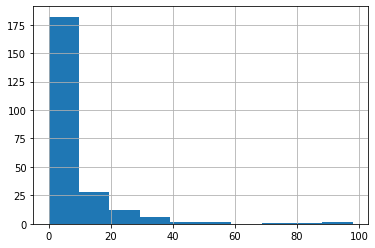

In [19]:
counts.hist()

<AxesSubplot:>

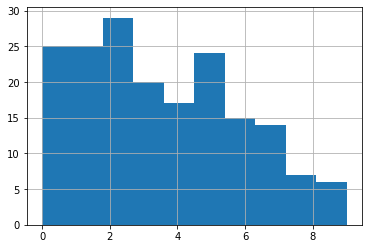

In [21]:
counts[counts < 10].hist()

In [14]:
with ix.searcher() as s:
    docnums = s.document_numbers(description='dichte')
    keywords = [keyword for keyword, score
                in s.key_terms(docnums, "description")]
    print(keywords)

['dichte', 'boot', 'modell', 'elemente', 'das']


In [24]:
from ir_evaluation.effectiveness import effectiveness
import ir_evaluation.datasets as datasets
ir=effectiveness()

#### Precision based methods: AP@n, MAP, GMAP, IAP, R-Precision and F-Measure

In [87]:
help(ir)

Help on effectiveness in module ir_evaluation.effectiveness object:

class effectiveness(builtins.object)
 |  Methods defined here:
 |  
 |  ap_at_n(self, interactions, boundaries=['all'])
 |  
 |  bpref(self, interactions, boundaries=['all'])
 |  
 |  cgain(self, interactions, boundaries=['all'])
 |  
 |  dcgain(self, interactions, boundaries=['all'])
 |  
 |  err(self, interactions, max_grade=5, boundaries=['all'])
 |  
 |  fmeasure(self, interactions, boundaries=['all'])
 |  
 |  gmap(self, interactions, constant=0.01, boundaries=['all'])
 |  
 |  iap(self, interactions)
 |  
 |  mean_ap(self, interactions, boundaries=['all'])
 |  
 |  mrr(self, interactions)
 |  
 |  ncgain(self, interactions, boundaries=['all'])
 |  
 |  ndcgain(self, interactions, boundaries=['all'])
 |  
 |  rbprecision(self, interactions, p=[0.5, 0.8, 0.95], boundaries=['all'])
 |  
 |  rprecision(self, interactions, boundaries=['all'])
 |  
 |  ------------------------------------------------------------------

In [30]:
def get_potential_query_terms(item):
    keywords = item.get('Schlagwörter:')
    description = item['description']
    title = item['title']
    query_terms = None
    if keywords:
        keyword_list = [k.replace(';', '') for k in keywords.split(' ')]
        prev=None
        keyphrase_list = []
        for k in keyword_list:
            if prev:
                keyphrase_list.append(' '.join([prev, k]))
            else:
                if k.endswith('ische'):
                    prev = k
                else:
                    keyphrase_list.append(k)
        query_terms = list(set(keyphrase_list))
    else:
        nouns_in_title = [w for w in title.split(' ') if (len(w) > 0) and re.match('[A-Z]', w[0])]
        query_terms = nouns_in_title
    return query_terms

query_terms = [get_potential_query_terms(c) for c in chemie]

In [70]:
interactions = {}
for term in chemie_terms['topic']:
    interactions[term] = {}
    interactions[term]['related_documents'] = set()
    for i, q_terms in enumerate(query_terms):
        if term in q_terms:
            interactions[term]['related_documents'].add(i)
    if len(interactions[term]['related_documents']) == 0:
        del interactions[term]
    else:
        q = mparser.parse(term)
        with ix.searcher() as s:
            results = s.search(q)
            interactions[term]['total_result'] = len(results)
            interactions[term]['visited_documents'] = [position_by_url[r['url']] for r in results]
            interactions[term]['visited_documents_orders'] = {position_by_url[r['url']]: i 
                                                              for i, r in enumerate(results)}
        if interactions[term]['total_result'] == 0:
            del interactions[term]

In [79]:
dir(ir)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ap_at_n',
 'bpref',
 'cgain',
 'dcgain',
 'err',
 'fmeasure',
 'gmap',
 'iap',
 'mean_ap',
 'mrr',
 'ncgain',
 'ndcgain',
 'rbprecision',
 'rprecision']

In [80]:
help(ir.rprecision)

Help on method rprecision in module ir_evaluation.effectiveness:

rprecision(interactions, boundaries=['all']) method of ir_evaluation.effectiveness.effectiveness instance



In [83]:
results = []
for k in interactions:
    result = ir.ap_at_n({k: interactions[k]}, [5])[5]['value']
    results.append((k, result))

In [84]:
results

[('Periodensystem', 0.2),
 ('Kalk', 0.4),
 ('Energie', 1.2),
 ('Metall', 1.0),
 ('Salz', 1.0),
 ('Eisen', 0.8),
 ('Feuer', 1.2),
 ('Nachhaltigkeit', 0),
 ('Sauerstoff', 0.6),
 ('Luft', 0.8),
 ('Verbrennung', 0.2),
 ('Säure', 0.6),
 ('Bindung', 0.2),
 ('Teilchenmodell', 0.4),
 ('Atom', 0.2),
 ('Elektrochemie', 1.0),
 ('Licht', 0.4),
 ('Stromerzeugung', 0.4),
 ('Aggregatzustand', 0),
 ('Ionenbindung', 1.2),
 ('Molekül', 0.0),
 ('Umwelt', 0.8),
 ('Astronomie', 0.2),
 ('Base', 0.8),
 ('Optik', 0.6),
 ('Relativitätstheorie', 0.4),
 ('Elektrizität', 1.2),
 ('Nahrung', 0),
 ('Gleichgewicht', 0.2),
 ('Halbleiterphysik', 1.0),
 ('Kunststoff', 0.8),
 ('Lebensmittel', 0.8),
 ('Umweltschutz', 0.0),
 ('Zucker', 0.6),
 ('Korrosion', 1.0),
 ('Magnesium', 0.6),
 ('Sternhimmel', 0.8),
 ('Temperatur', 0.2),
 ('Treibhauseffekt', 0.8),
 ('Gesundheit', 0.4),
 ('Kohlensäure', 0),
 ('Ozean', 0),
 ('Rakete', 0.6),
 ('Stickstoff', 0),
 ('Trinkwasser', 0.6),
 ('Destillieren', 0),
 ('Erneuerbare', 0.8),
 ('Gewic

In [85]:
########################################################################################
# parameters => (data, boundaries)

print ("Average Precision@n:")
ap_at_n = ir.ap_at_n(interactions,[5,10,15,20,'all'])
print(ap_at_n)

print("\n")

print ("R-Precision@n:")
rprecision = ir.rprecision(interactions,[5,10,15,20,'all'])
print(rprecision)

print("\n")

print ("Mean Average Precision:")
# mean_ap = ir.mean_ap(interactions,[5,10,15,20,'all'])
# print(mean_ap)

print("\n")

print ("F-Measure:")
fmeasure = ir.fmeasure(interactions,[5,10,15,20,'all'])
print(fmeasure)

print("\n")
########################################################################################
# parameters -> (data, constant, boundaries)

print ("Geometric Mean Average Precision:")
# gmap = ir.gmap(interactions,0.3,[5,10,15,20,'all'])
# print(gmap)

print("\n")
########################################################################################
# parameters -> (data)

print ("Eleven Point - Interpolated Average Precision:")
print ("Recall => Precision")
# iap = ir.iap(interactions)
# print(iap)

Average Precision@n:
{5: {'count': 120, 'value': 0.4650000000000004}, 10: {'count': 54, 'value': 0.3462962962962963}, 15: {'count': 36, 'value': 0.24814814814814812}, 20: {'count': 26, 'value': 0.18076923076923074}, 'all': {'count': 211, 'value': 0.41084924569280357}}


R-Precision@n:
{5: {'count': 120, 'value': 0.37500703303971544}, 10: {'count': 54, 'value': 0.48475180641635085}, 15: {'count': 36, 'value': 0.5180987755955924}, 20: {'count': 26, 'value': 0.48027962335213864}, 'all': {'count': 211, 'value': 0.38869597504614267}}


Mean Average Precision:


F-Measure:
{5: {'count': 120, 'value': 0.37724500339128814}, 10: {'count': 54, 'value': 0.3486534695768685}, 15: {'count': 36, 'value': 0.2870349808050073}, 20: {'count': 26, 'value': 0.22577654700178137}, 'all': {'count': 211, 'value': 0.33748714522501233}}


Geometric Mean Average Precision:


Eleven Point - Interpolated Average Precision:
Recall => Precision
